In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\AZhar ALi\\Downloads\\Google_stock_price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

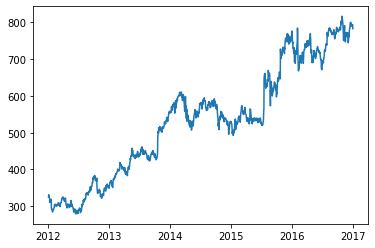

In [5]:
plt.plot(pd.to_datetime(df['Date']),df['Open'])

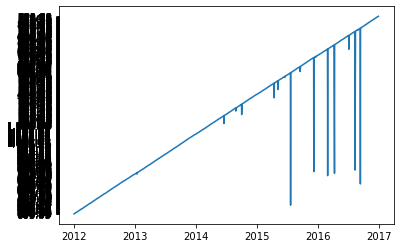

In [6]:
plt.plot(pd.to_datetime(df['Date']),df['Close'])

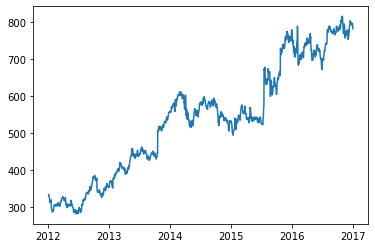

In [7]:
plt.plot(pd.to_datetime(df['Date']),df['High'])

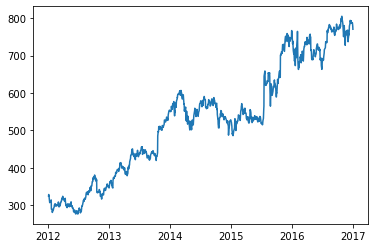

In [8]:
plt.plot(pd.to_datetime(df['Date']),df['Low'])

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [13]:
df['Open']


0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [14]:
df['Close']

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: object

In [15]:
df['High']

0       332.83
1       333.87
2       330.75
3       328.77
4       322.29
         ...  
1253    792.74
1254    797.86
1255    794.23
1256    785.93
1257    782.78
Name: High, Length: 1258, dtype: float64

In [16]:
df['Low']

0       324.97
1       329.08
2       326.89
3       323.68
4       309.46
         ...  
1253    787.28
1254    787.66
1255    783.20
1256    778.92
1257    770.41
Name: Low, Length: 1258, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
scaler.fit(df[['Open']])
X = scaler.transform(df[['Open']])


In [20]:
rows = []
for i in range(1198):
    rows.append(X[i:61+i])
X = np.array(rows)
X.shape

(1198, 61, 1)

In [21]:
X_train = X[:,:60]
y_train = X[:,-1]
X_train.shape, y_train.shape

((1198, 60, 1), (1198, 1))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [23]:
model = Sequential()
model.add(LSTM(100,return_sequences = True, input_shape=(60,1)))
model.add(LSTM(100,return_sequences = True))
model.add(LSTM(100,return_sequences = True))
model.add(LSTM(100,return_sequences = False))
model.add(Dense(1))

model.compile(loss='mean_squared_error', metrics=['MeanAbsolutePercentageError'])

In [24]:
model.fit(X_train,y_train,batch_size=32, epochs=50)

Epoch 1/50
38/38 [==============================] - 22s 260ms/step - loss: 0.0835 - mean_absolute_percentage_error: 106926.3750
Epoch 2/50
38/38 [==============================] - 9s 249ms/step - loss: 0.0167 - mean_absolute_percentage_error: 66608.8359
Epoch 3/50
38/38 [==============================] - 9s 248ms/step - loss: 0.0157 - mean_absolute_percentage_error: 51721.2227
Epoch 4/50
38/38 [==============================] - 9s 246ms/step - loss: 0.0113 - mean_absolute_percentage_error: 18549.2676
Epoch 5/50
38/38 [==============================] - 9s 249ms/step - loss: 0.0091 - mean_absolute_percentage_error: 19838.6602
Epoch 6/50
38/38 [==============================] - 10s 250ms/step - loss: 0.0083 - mean_absolute_percentage_error: 28689.0449
Epoch 7/50
38/38 [==============================] - 9s 249ms/step - loss: 0.0070 - mean_absolute_percentage_error: 7332.0610
Epoch 8/50
38/38 [==============================] - 9s 246ms/step - loss: 0.0059 - mean_absolute_percentage_error: 2

In [25]:
df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [27]:
df_test = pd.read_csv('C:\\Users\\AZhar ALi\\Downloads\\Google_Stock_Price_Test.csv')

In [28]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [29]:
test = pd.concat([df[['Open']].iloc[-60:], df_test[['Open']]])
test

,Open
1198,779.00
1199,779.66
1200,777.71
1201,786.66
1202,783.76
...,...
15,829.62
16,837.81
17,834.71
18,814.66


In [30]:
test = pd.concat([df[['Open']].iloc[-60:], df_test[['Open']]])
test

,Open
1198,779.00
1199,779.66
1200,777.71
1201,786.66
1202,783.76
...,...
15,829.62
16,837.81
17,834.71
18,814.66


In [31]:
rows = []
for i in range(20):
    rows.append(test[i:60+i])
X_test = np.array(rows)
X_test.shape

(20, 60, 1)

In [32]:
yp = model.predict(X_test)

1/1 [==============================] - 3s 3s/step
